In [1]:
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import os
import matplotlib.pyplot as plt
import numpy as np

augmentation = iaa.Sequential([
    iaa.WithColorspace(to_colorspace="HSV", from_colorspace="RGB", children=[
        iaa.WithChannels([0,1], iaa.Multiply((0.5, 1.5))),
        iaa.WithChannels(2, iaa.Multiply((0.7, 1.3)))
    ]),
    iaa.OneOf([
        iaa.Flipud(1),
        iaa.Fliplr(1),
        iaa.Affine(rotate=iap.Uniform(0, 90)),
        iaa.Affine(rotate=90),
        iaa.Affine(rotate=iap.Uniform(90, 180)),
        iaa.Affine(rotate=180),
        iaa.Affine(rotate=iap.Uniform(180, 270)),
        iaa.Affine(rotate=270),
        iaa.Affine(rotate=iap.Uniform(270, 360)),
        iaa.Affine(rotate=360),
    ])
])
fns = os.listdir('../../data/processedBuildingLabels/3band')

i = np.random.choice(len(fns))
fn = fns[i]
image = plt.imread(f'../../data/processedBuildingLabels/3band/{fn}')
# Assume image will already be cropped to 320x320.
image = image[:320, :320, :]

images_aug = augmentation.augment_images([image]*10)
images_aug = np.array(images_aug)
print(images_aug.shape)

(10, 320, 320, 3)


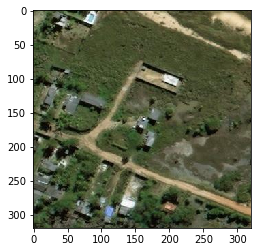

In [2]:
plt.imshow(image)

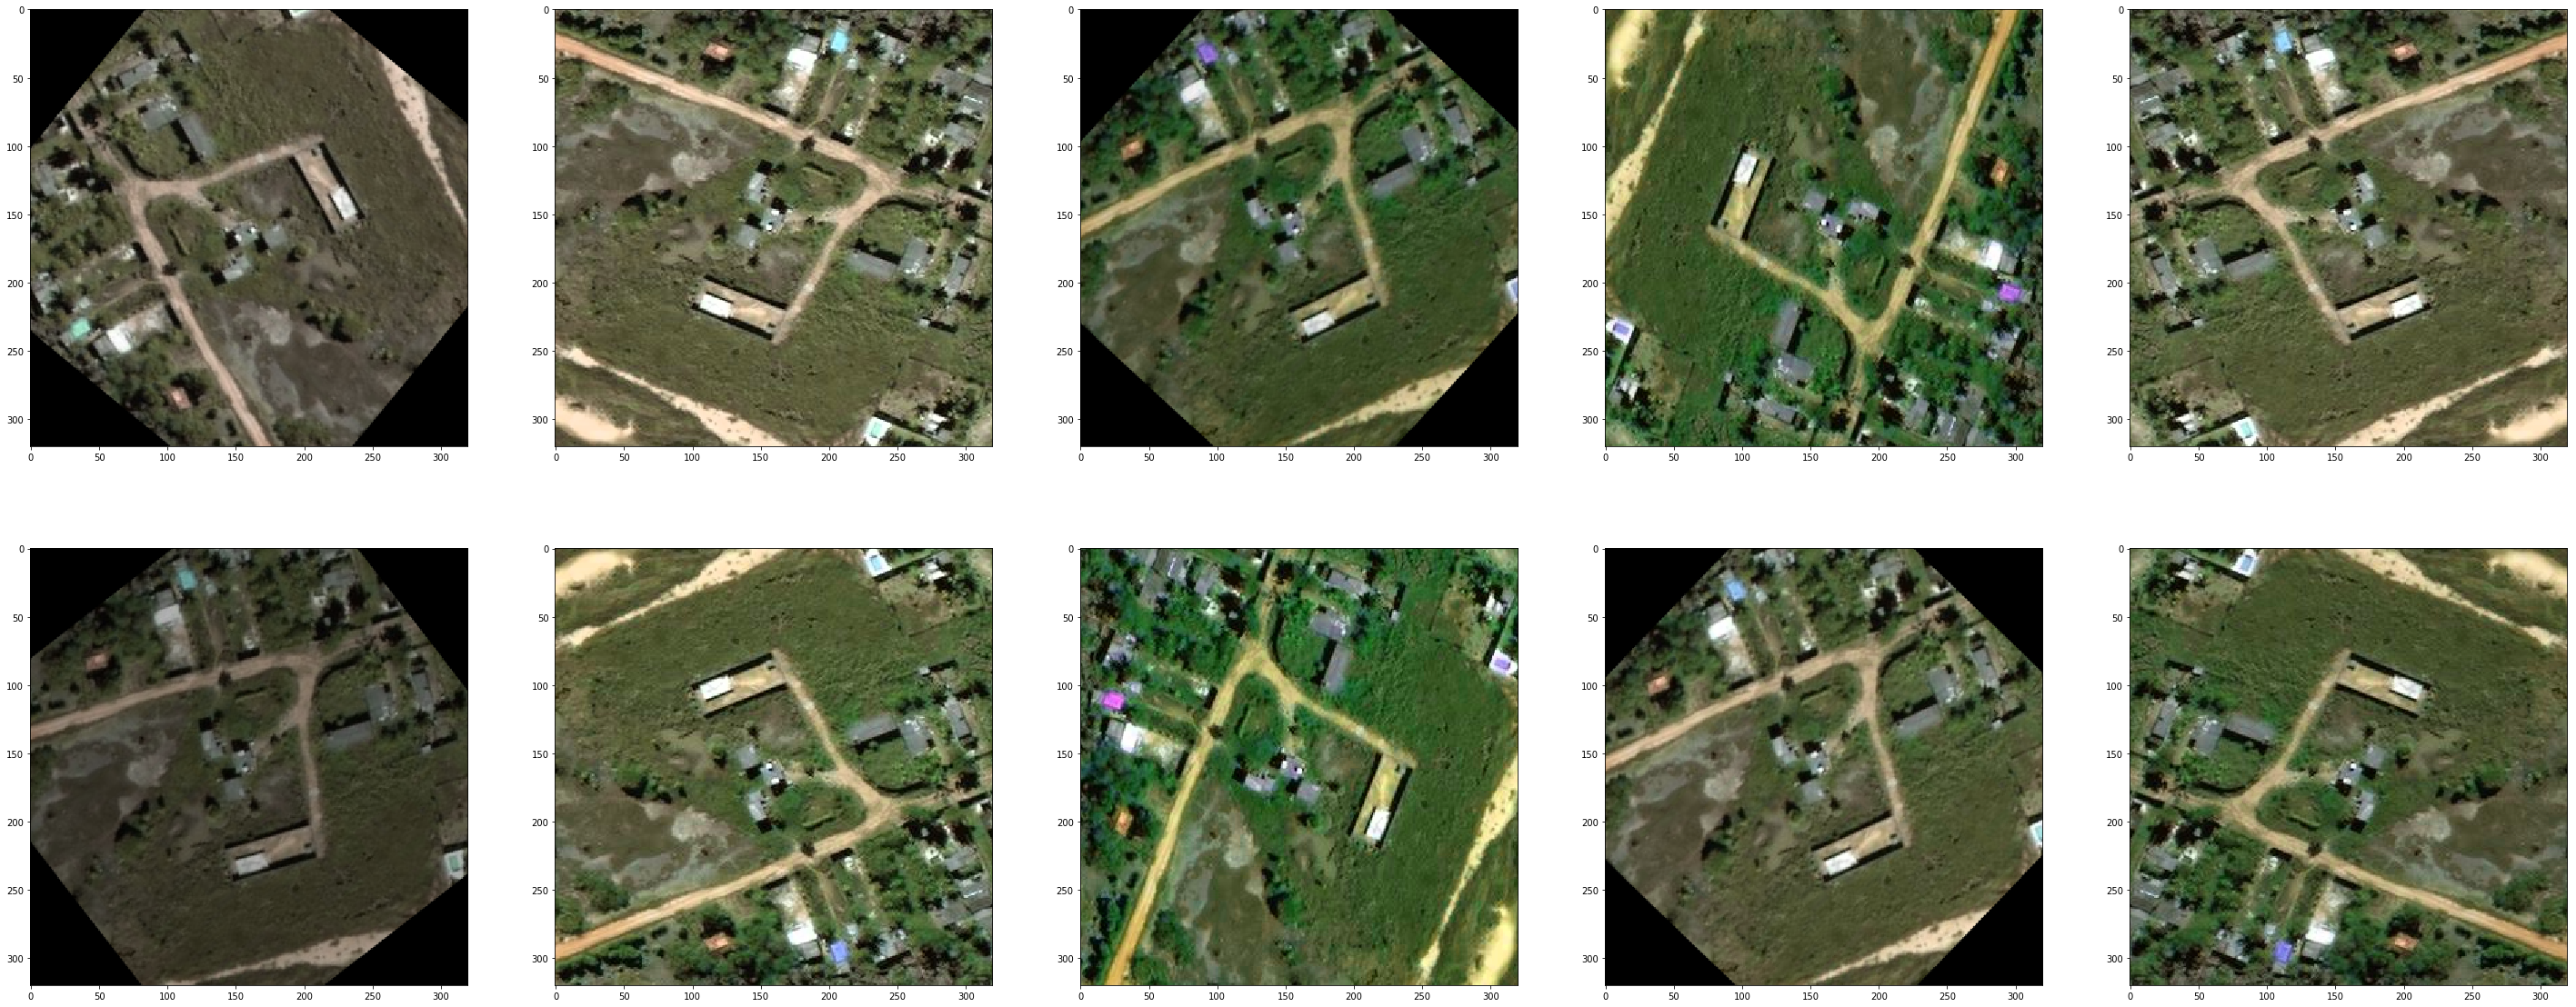

In [3]:
plt.figure(figsize=(50, 20))
for i in range(0, 10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images_aug[i])